In [30]:
import os
import re
import numpy as np
import pandas as pd
import csv
import nltk
import torch

from tqdm import tqdm
import matplotlib.pyplot as plt


In [1]:
from nltk.stem import WordNetLemmatizer 
wnl = WordNetLemmatizer() 
print(wnl.lemmatize('leaves')) 

leaf


In [1]:
import nltk
from nltk.corpus import stopwords

In [2]:
stopworddic = set(stopwords.words('english')) 

In [3]:
print(stopworddic)

{'any', 'as', 'was', 'down', 'they', 'can', 'she', 'her', 'same', 'been', 'himself', 'having', 'but', 'no', 'more', 'on', 'all', 'me', 'is', 'against', 'off', 'how', 'their', 'had', 'did', 'this', 'my', 'or', 'why', 'because', 'being', 'he', 'are', 'his', 'ourselves', 'few', 'our', 'then', 'yourselves', 'i', 'should', 'only', 'such', 'too', 'what', 'nor', 'those', 'there', 'about', 'that', 'here', 'very', 'below', 't', 'so', 'above', 's', 'now', 'in', 'each', 'not', 'yours', 'other', 'be', 'these', 'than', 'does', 'when', 'further', 'which', 'themselves', 'by', 'once', 'at', 'where', 'myself', 'theirs', 'if', 'who', 'to', 'will', 'into', 'with', 'were', 'herself', 'of', 'after', 'over', 'before', 'just', 'both', 'your', 'while', 'him', 'doing', 'for', 'again', 'its', 'an', 'own', 'the', 'out', 'between', 'hers', 'you', 'and', 'from', 'don', 'it', 'under', 'until', 'have', 'ours', 'some', 'during', 'through', 'am', 'whom', 'has', 'itself', 'do', 'we', 'yourself', 'them', 'a', 'most', 'u

In [41]:
import csv
import re
def load_data(filepath):
    labels = []
    texts = []
    htmlstr = re.compile('&lt.*?&gt;')
    with open(filepath, 'r') as f:
        cr = csv.DictReader(f)
        for row in cr:
            labels.append(int(row['Class Index'])-1)
            text = (row['Title'].lower().strip()
            +' [<sep>] '
            +row['Description'].lower().strip())
            print(text)
            text = re.sub(htmlstr, ' ', text)
            print(text)

            text = text.replace('\\', ' ')
            print(text)

            texts.append(text)
    return labels, texts
            

In [42]:
_, t = load_data('nlphw2/data/ddev.csv')

daimlerchrysler sued over\car seat injury\ [<sep>] \" detroit (reuters) - daimlerchrysler ag &lt;a href=""http://www.investor.reuters.com/fullquote.aspx?ticker=dcx.n target=/stocks/quickinfo/fullquote""&gt;dcx.n&lt;/a&gt; &lt;a href=""http://www.investor.reuters.com/fullquote.aspx?ticker=dcxgn.de target=/stocks/quickinfo/fullquote""&gt;dcxgn.de&lt;/a&gt;  has been hit with a multimillion-dollar lawsuit filed by a  paraplegic who\\says the automaker's heated car seats caused him  a severe burn injury."
daimlerchrysler sued over\car seat injury\ [<sep>] \" detroit (reuters) - daimlerchrysler ag  dcx.n   dcxgn.de   has been hit with a multimillion-dollar lawsuit filed by a  paraplegic who\\says the automaker's heated car seats caused him  a severe burn injury."
daimlerchrysler sued over car seat injury  [<sep>]  " detroit (reuters) - daimlerchrysler ag  dcx.n   dcxgn.de   has been hit with a multimillion-dollar lawsuit filed by a  paraplegic who  says the automaker's heated car seats caus

In [43]:
_

[2]

In [44]:
t

['daimlerchrysler sued over car seat injury  [<sep>]  " detroit (reuters) - daimlerchrysler ag  dcx.n   dcxgn.de   has been hit with a multimillion-dollar lawsuit filed by a  paraplegic who  says the automaker\'s heated car seats caused him  a severe burn injury."']

In [18]:
htmlstr = re.compile('&lt.*?&gt;')

In [27]:
x = '  sd s\d &lth&gt;\\hh dsa\d bd&ltjh &gt;ddd '

In [28]:
y=re.sub(htmlstr, '', x)
y.replace('\\', ' ')

'  sd s d  hh dsa d bdddd '

In [4]:
from nltk.tokenize import word_tokenize


In [10]:
word_tokenize("n Every Search Query   John\Battelle's Search.  dd ")

['n', 'Every', 'Search', 'Query', 'John\\Battelle', "'s", 'Search', '.', 'dd']

3,DaimlerChrysler Sued Over Car Seat Injury," DETROIT (Reuters) - DaimlerChrysler AG &lt;A HREF=""http://www.investor.reuters.com/FullQuote.aspx?ticker=DCX.N target=/stocks/quickinfo/fullquote""&gt;DCX.N&lt;/A&gt; &lt;A HREF=""http://www.investor.reuters.com/FullQuote.aspx?ticker=DCXGn.DE target=/stocks/quickinfo/fullquote""&gt;DCXGn.DE&lt;/A&gt;  has been hit with a multimillion-dollar lawsuit filed by a  paraplegic who says the automaker's heated car seats caused him  a severe burn injury."


In [8]:
import re

# 过滤不了\\ \ 中文（）还有————
r1 = u'[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'#用户也可以在此进行自定义过滤字符 
# 者中规则也过滤不完全
r2 = "[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+"
# \\\可以过滤掉反向单杠和双杠，/可以过滤掉正向单杠和双杠，第一个中括号里放的是英文符号，第二个中括号里放的是中文符号，第二个中括号前不能少|，否则过滤不完全
r3 =  "[.!//_,$&%^*()<>+\"'?@#-|:~{}]+|[——！\\\\，。=？、：“”‘’《》【】￥……（）]+" 
# 去掉括号和括号内的所有内容
r4 =  "\\【.*?】+|\\《.*?》+|\\#.*?#+|[.!/_,$&%^*()<>+""'?@|:~{}#]+|[——！\\\，。=？、：“”‘’￥……（）《》【】]"

sentence = '3,SPX Board Amends Compensation Pr\\ograms, \\ CHICA\GO (Reuters) - SPX Corp.s &lt;A HREF=""http://www.investor.reuters.com/FullQuote.aspx?ticker=SPW.N target=/stocks/quickinfo/fullquote""&gt;SPW.N&lt;/A&gt; board amended its  management restricted stock and director compensation programs  the\\day after its chairman and chief executive resigned, the  company said on Friday"'

cleanr = re.compile('<.*?>')
sentence = re.sub(cleanr, ' ', sentence)        #去除html标签
sentence = re.sub(r4,'',sentence)
print(sentence)

3SPX Board Amends Compensation Programs  CHICAGO Reuters - SPX Corps lt;A HREF""httpwwwinvestorreuterscomFullQuoteaspxtickerSPWN targetstocksquickinfofullquote""gt;SPWNlt;Agt; board amended its  management restricted stock and director compensation programs  theday after its chairman and chief executive resigned the  company said on Friday"


In [32]:
labels, texts = load_data('data/dev.csv')

In [75]:
if torch.cuda.is_available():       
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [35]:
device = torch.device("cpu")

In [36]:
from nltk.tokenize import word_tokenize
from collections import defaultdict

In [37]:
def tokenize(sents):
    max_len = 0
    tokenized_sents = []
    wd2idx = {}
    wd2idx['<pad>'] = 0
    wd2idx['<unk>'] = 1
    idx = 2
    for sent in sents:
        tokenized_sent = word_tokenize(sent)
        max_len = max(max_len, len(tokenized_sent))
        tokenized_sents.append(tokenized_sent)
        for token in tokenized_sent:
            if token not in wd2idx:
                wd2idx[token] = idx
                idx += 1
    return tokenized_sents, wd2idx, max_len

In [38]:
def encode(tokenized_sents, wd2idx, max_len):
    input_ids = []
    for tokenized_sent in tokenized_sents:
        tokenized_sent += ['<pad>']*(max_len - len(tokenized_sent))
        input_id = [wd2idx[token] for token in tokenized_sent]
        input_ids.append(input_id)
    return np.array(input_ids)

In [39]:
from tqdm import  tqdm_notebook

In [40]:
def load_prevec(wd2idx, filepath):
    fprevec = open(filepath, 'r')
    dim = int(fprevec.readline().split()[1])
    embeddings = np.random.uniform(-0.25, 0.25, (len(wd2idx), dim))
    count = 0
    for wdembd in tqdm_notebook(fprevec):
        wd = wdembd.rstrip().split(' ')[0]
        embd = wdembd.rstrip().split(' ')[1:]
        if wd in wd2idx:
            count += 1
            embeddings[wd2idx[wd]] = np.array(embd, dtype=np.float32)
    print(count)
    print(len(wd2idx))
    return embeddings

In [41]:
tokenized_sents, wd2idx, max_len = tokenize(texts)
input_ids = encode(tokenized_sents, wd2idx, max_len)
embeddings = load_prevec(wd2idx, 'fastText/crawl-300d-2M.vec')
embeddings = torch.tensor(embeddings)


23078
27798


In [42]:
from torch.utils.data import (TensorDataset, DataLoader, RandomSampler, SequentialSampler)

In [43]:
def data_loader(train_inputs, val_inputs, train_labels, val_labels, batch_size=64):
    train_inputs, val_inputs, train_labels, val_labels =  tuple(torch.tensor(data) for data in [train_inputs, val_inputs, train_labels, val_labels])
    train_data = TensorDataset(train_inputs, train_labels)
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
    val_data = TensorDataset(val_inputs, val_labels)
    val_sampler = SequentialSampler(val_data)
    val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

    return train_dataloader, val_dataloader

In [15]:
def collate_fn(batch):
    # print(batch)
    token_idx = list(map(lambda x: x[0], batch))
    tag_idx = list(map(lambda x: x[1], batch))
    #print(token_idx)
    #print(tag_idx)
    return token_idx, tag_idx

In [16]:
import torch
import torch.utils.data as Data


BATCH_SIZE = 5

x = torch.linspace(1, 10, 10)
y = torch.linspace(10, 1, 10)

torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    collate_fn=collate_fn
)

for epoch in range(3):
    for step, (batch_x, batch_y) in enumerate(loader):
        # print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              # batch_x.numpy(), '| batch y: ', batch_y.numpy())
        pass

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, test_size=0.1, random_state=42)
train_dataloader, val_dataloader = data_loader(train_inputs, val_inputs, train_labels, val_labels, batch_size=64)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [47]:
class CNN_TCLF(nn.Module):
    def __init__(self
                ,pretrained_embedding=None
                ,freeze_embedding=False
                ,vocab_size=None
                ,embed_dim=300
                ,filter_sizes=[3, 4, 5]
                ,num_filters=[100, 100, 100]
                ,num_classes=4
                ,dropout=0.5):
        super(CNN_TCLF, self).__init__()
        if pretrained_embedding is not None:
            self.vocab_size, self.embed_dim = pretrained_embedding.shape
            self.embedding = nn.Embedding.from_pretrained(pretrained_embedding, freeze=freeze_embedding)
        else:
            self.embed_dim = embed_dim
            self.embedding = nn.Embedding(num_embeddings=vocab_size, 
                                            embedding_dim=self.embed_dim, 
                                            padding_idx=0, 
                                            max_norm=5.0)
        self.conv1d_list = nn.ModuleList([nn.Conv1d(in_channels=self.embed_dim, out_channels=num_filters[i], kernel_size=filter_sizes[i]) for i in range(len(filter_sizes))])
        self.fc = nn.Linear(np.sum(num_filters), num_classes)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, input_ids):
        x_embed = self.embedding(input_ids).float()
        x_reshaped = x_embed.permute(0, 2, 1)
        x_conv_list = [F.relu(conv1d(x_reshaped)) for conv1d in self.conv1d_list]
        x_pool_list = [F.max_pool1d(x_conv, kernel_size=x_conv.shape[2]) for x_conv in x_conv_list]
        x_fc = torch.cat([x_pool.squeeze(dim=2) for x_pool in x_pool_list], dim=1)
        logits = self.fc(self.dropout(x_fc))
        return logits



In [ ]:
class LSTM_TCLF(nn.Module):
    def __init__(self
                ,pretrained_embedding=None
                ,freeze_embedding=False
                ,vocab_size=None
                ,hidden_size=200
				,bidirectional=True
                ,embed_dim=300
                ,num_classes=4
                ,dropout=0.5):

        super(LSTM_TCLF, self).__init__()
        if pretrained_embedding is not None:
            self.vocab_size, self.embed_dim = pretrained_embedding.shape
            self.embedding = nn.Embedding.from_pretrained(pretrained_embedding, freeze=freeze_embedding)
        else:
            self.embed_dim = embed_dim
            self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=self.embed_dim, padding_idx=0, max_norm=5.0)


        self.lstm = nn.LSTM(input_size=self.embed_dim,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True,
                            bidirectional=bidirectional)
        self.drop = nn.Dropout(p=dropout)

        self.fc = nn.Linear(2*hidden_size, num_classes)

    def forward(self, text, text_len):

        text_emb = self.embedding(text)

        packed_input = pack_padded_sequence(text_emb, text_len, batch_first=True, enforce_sorted=False)
        packed_output, _ = self.lstm(packed_input)
        output, _ = pad_packed_sequence(packed_output, batch_first=True)

        out_forward = output[range(len(output)), text_len - 1, :self.dimension]
        out_reverse = output[:, 0, self.dimension:]
        out_reduced = torch.cat((out_forward, out_reverse), 1)
        text_fea = self.drop(out_reduced)

        text_fea = self.fc(text_fea)


        return text_out

In [48]:
# todo batch padding and form

In [49]:
import torch.optim as optim

In [68]:
def initilize_model(
    pretrained_embedding=None,
    freeze_embedding=False,
    vocab_size=None,
    embed_dim=300,
    filter_sizes=[3, 4, 5],
    num_filters=[100, 100, 100],
    num_classes=4,
    dropout=0.5,
    learning_rate=0.01
):
    cnn_model = CNN_TCLF(
        pretrained_embedding=pretrained_embedding,
        freeze_embedding=freeze_embedding,
        embed_dim=embed_dim,
        filter_sizes=filter_sizes,
        num_filters=num_filters,
        num_classes=num_classes,
        dropout=dropout
    )
    cnn_model.to(device)
    optimizer = optim.Adadelta(
        cnn_model.parameters(),
        lr=learning_rate,
        rho=0.95
    )
    return cnn_model, optimizer

In [ ]:
def initilize_lstm_model(
    pretrained_embedding=None,
    freeze_embedding=False,
    vocab_size=None,
    embed_dim=300,
    filter_sizes=[3, 4, 5],
    num_filters=[100, 100, 100],
    num_classes=4,
    dropout=0.5,
    learning_rate=0.01
):
    cnn_model = CNN_TCLF(
        pretrained_embedding=pretrained_embedding,
        freeze_embedding=freeze_embedding,
        embed_dim=embed_dim,
        filter_sizes=filter_sizes,
        num_filters=num_filters,
        num_classes=num_classes,
        dropout=dropout
    )
    cnn_model.to(device)
    optimizer = optim.Adadelta(
        cnn_model.parameters(),
        lr=learning_rate,
        rho=0.95
    )
    return cnn_model, optimizer

In [69]:
import random
import time
from tqdm import tqdm

In [70]:
loss_fn = nn.CrossEntropyLoss()
def set_seed(seed_value=42):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

In [71]:
def train(model, optimizer, train_dataloader, val_dataloader=None, epochs=10):
    best_acc = 0
    for epoch_i in range(epochs):
        t_start = time.time()
        model.train()
        total_loss = 0
        for batch in tqdm(train_dataloader):
            b_input_ids, b_labels = tuple(t.to(device) for t in batch)
            model.zero_grad()
            logits = model(b_input_ids)
            loss = loss_fn(logits, b_labels)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
        avg_train_loss = total_loss / len(train_dataloader)
        if val_dataloader is not None:
            val_loss, val_acc = evaluate(model, val_dataloader)
            if val_acc > best_acc:
                best_acc = val_acc
            time_elapsed = time.time() - t_start
            print(f'epoch: {epoch_i}/{epochs} | avg_train_loss: {avg_train_loss} | val_loss: {val_loss} | val_acc: {val_acc} | best_acc: {best_acc} | time: {time_elapsed}')

    print('\n')
    print(f'Training complete. Best acc = {best_acc:.3f}%.')



In [72]:
def evaluate(model, val_dataloader):
    model.eval()
    val_acc = []
    val_loss = []
    for batch in tqdm(val_dataloader):
        b_input_ids, b_labels = tuple(t.to(device) for t in batch)
        with torch.no_grad():
            logits = model(b_input_ids)
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())
        preds = torch.argmax(logits, dim=1).flatten()
        acc = (preds == b_labels).cpu().numpy().mean()*100
        val_acc.append(acc)
    val_loss = np.mean(val_loss)
    val_acc = np.mean(val_acc)
    return val_loss, val_acc

In [73]:
set_seed(42)
cnn_non_static, optimizer = initilize_model(pretrained_embedding=embeddings, freeze_embedding=False, learning_rate=0.25, dropout=0.5)

In [74]:
train(cnn_non_static, optimizer, train_dataloader, val_dataloader, epochs=1)

100%|██████████| 19/19 [00:00<00:00, 175.63it/s]epoch: 0/1 | avg_train_loss: 0.7174628960439958 | val_loss: 0.3106379924636138 | val_acc: 91.37260765550239 | best_acc: 91.37260765550239 | time: 2.982715129852295


Training complete. Best acc = 91.373%.



In [63]:
def predict(text, model=cnn_non_static.to('cpu'), max_len=62):
    tokens = word_tokenize(text.lower())
    padded_tokens = tokens + ['<pad>']*(max_len - len(tokens))
    input_id = [wd2idx.get(token, wd2idx['<unk>']) for token in padded_tokens]
    input_id = torch.tensor(input_id).unsqueeze(dim=0)
    logits = model.forward(input_id)
    probs = F.softmax(logits, dim=1).squeeze(dim=0)
    print(f'P: {probs}')

In [66]:
predict('Intel stock up on positive 4Q outlook [sep] Intel Corp. #39;s shares climbed nearly 6 percent Friday after saying its fourth-quarter sales are on track to break a company record because demand for the chips that ')

P: tensor([0.0110, 0.0066, 0.8659, 0.1165], grad_fn=<SqueezeBackward1>)


In [1]:
import torch

In [4]:
lis = [[1, 2, 3], [4, 5]]

In [5]:
torch.tensor(lis)

ValueError: expected sequence of length 3 at dim 1 (got 2)

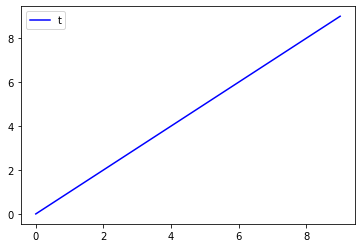

In [6]:
import numpy as np
import matplotlib.pyplot as plt

t = [i for i in range(10)]
plt.plot(t, [i for i in range(len(t))], 'b')
label = ['t', 't**2']
plt.legend(label, loc='upper left')
plt.savefig('./test2.jpg')
plt.show()
